In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

Simulates Brownian motion of a particle

In [8]:
def Brownian1(x0,T,N):
    '''
    A simple model for brownina motion
    
    Args:
        x0: Inital position
        T: Total time [s]
        N: Number of steps
    Returns:
        time: An array of time points
        xpoints: An array of particle's position
    '''
    
    #T = 5 # total time
    #N = 25000 # number of steps
    dt = T/N
    time = np.arange(0,T,dt)

    kb = 1.380649e-23 # Boltzman constant
    T = 18 + 278.15 # temperature K

    # damping coefficient 
    r = 5e-6 # particle radius m
    n = 18.3e-6 # viscosity of air at 18 C, units: kg/ (ms) 
    D = 6 * np.pi * r * n

    #Calculate diffusion coefficient
    B = kb * T / D


    #np.random.seed(1)
    #W = np.sqrt(2 * B * dt) * np.random.randn(1)
    xpoints = []
    #x0 = 0.04
    x=x0
    for t in time:     
        x = x + np.sqrt(2 * B * dt) * np.random.randn(1)
        xpoints.append(x)
    
    xpoints = np.concatenate( xpoints, axis=0 ) * 1e6
            
    plt.figure()
    plt.rcParams["figure.figsize"] = (8,6)
    plt.xlabel("time (s)")
    plt.ylabel("z (m)")
    #plt.yscale('log')
    #plt.xscale('log')
    #plt.title("Particle under Brownian Motion")
    plt.plot(time, xpoints, linewidth=1)
    
    return time, xpoints

def Brownian2(x0,T,N):
    
     '''
    A model for brownina particle in a viscous fluid
    
    Args:
        x0: Inital position
        T: Total time [s]
        N: Number of steps
    Returns:
        time: An array of time points
        xplt: An array of particle's position
    '''
    dt = T/N
    time = np.arange(0,T,dt)
    g = 9.81

    kb = 1.380649e-23 # Boltzman constant
    T = 18 + 278.15 # temperature K

    # damping coefficient 
    r = 2.5e-6 # particle radius m
    n = 18.3e-6 # viscosity of air at 18 C, units: kg/ (ms) 
    D = 6 * np.pi * r * n

    #mass of the silicone oil 
    volume = 4/3 * np.pi * r**3
    rho_p = 1.07e3
    m = rho_p * volume
    
    
    #Buoyancy Force
    rho_air = 1.212 # air density at 18C kg/m^3
    F_B = rho_air * g * volume
    #F_B = 1e-8
    
    # denominatior
    deno = 1 + dt * (D/m)
    #print(deno)
    

    #x0 = 0.04
    x = x0 
    x1 = 0
    xpoints = [x1,x0]
    for i in range(N): 
        x = (2 + dt * (D/m))/deno * x - 1/deno * xpoints[i] + np.sqrt(2 * kb * T * D) /(m * deno) * dt**1.5 * np.random.randn(1)
        xpoints.append(x)
    
    xplt = np.concatenate(xpoints[2:], axis=0) * 1e6
    plt.figure()
    plt.rcParams["figure.figsize"] = (8,6)
    plt.rcParams["font.size"] = 15
    plt.xlabel("Time (s)")
    plt.ylabel("Particle Position ($\mu$m)")
    #plt.yscale('log')
    #plt.xscale('log')
    plt.title('(a)')
    plt.plot(time, xplt, linewidth=1)
    return time, xplt
    
def fftplot(x,time):
      '''
    Plots the Fourier tranform of a given data
    
    Args:
        x: An array of particle's position
        time: An array of time points
        N: Number of steps
    Returns:
        A plot of the particle's motion in Fourier space
    '''
    amp_fft = np.fft.rfft(x)
    n = x.size

    T = np.max(time)
    N = len(time)-1
    sample_rate = N/T
    d = 1/sample_rate
    f = np.fft.fftfreq(n,d)

    amp_s = np.abs(amp_fft[1:int(n/2)]) * 2
    f_s = f[1:int(n/2)]
    
    plt.figure()
    plt.rcParams["figure.figsize"] = (8,6)
    plt.rcParams["font.size"] = 15
    plt.plot(f_s,amp_s) # plot the absolute coefficients
    plt.title('(b)')
    plt.ylim(np.min(amp_s) * 0.8 , np.max(amp_s)*2)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectrum ($\mu m^2 Hz^{-1}$)')
    plt.grid(True,which='both');
    plt.minorticks_on()
    plt.show()


<IPython.core.display.Javascript object>


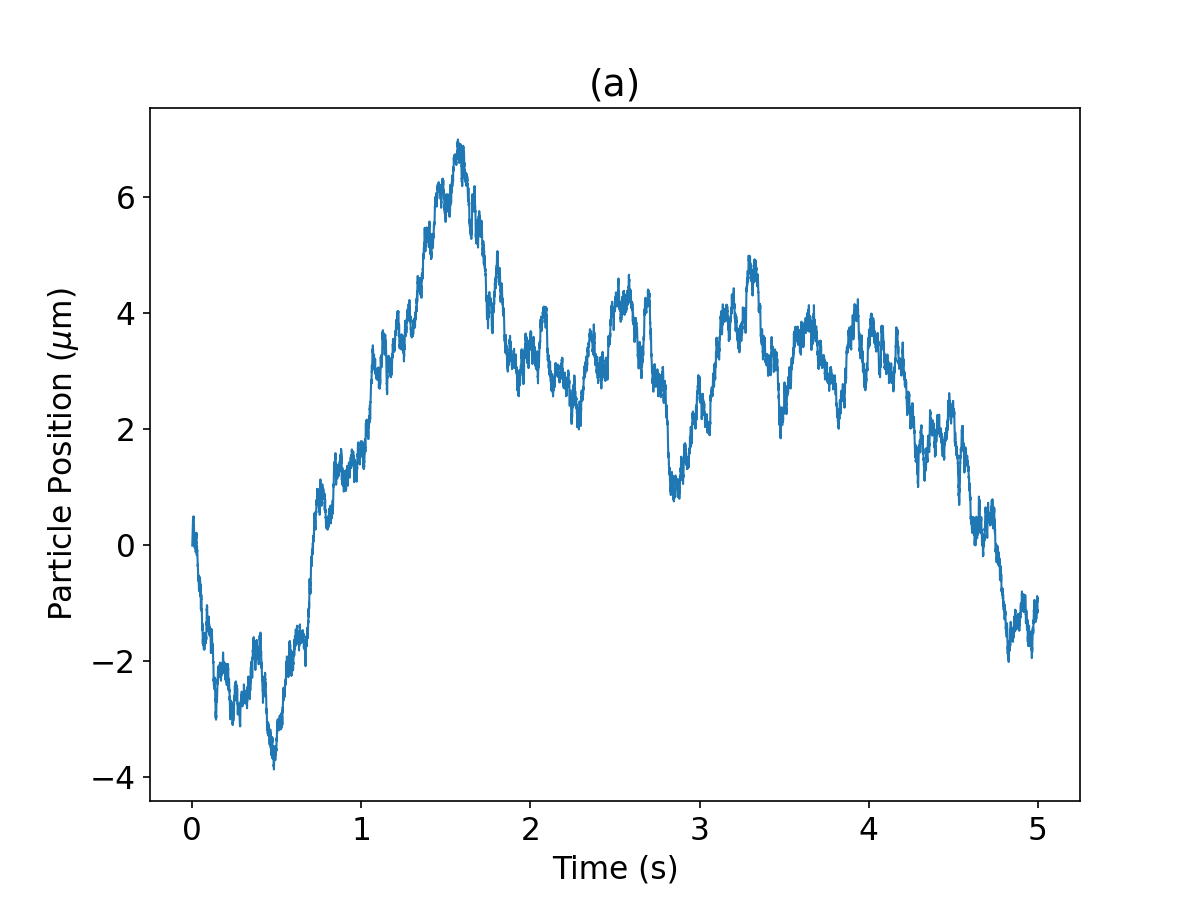

In [10]:
x0 = 0
T = 5
N = 25000
time,xpoints = Brownian2(x0,T,N)
plt.savefig('BM pos.png')

<IPython.core.display.Javascript object>


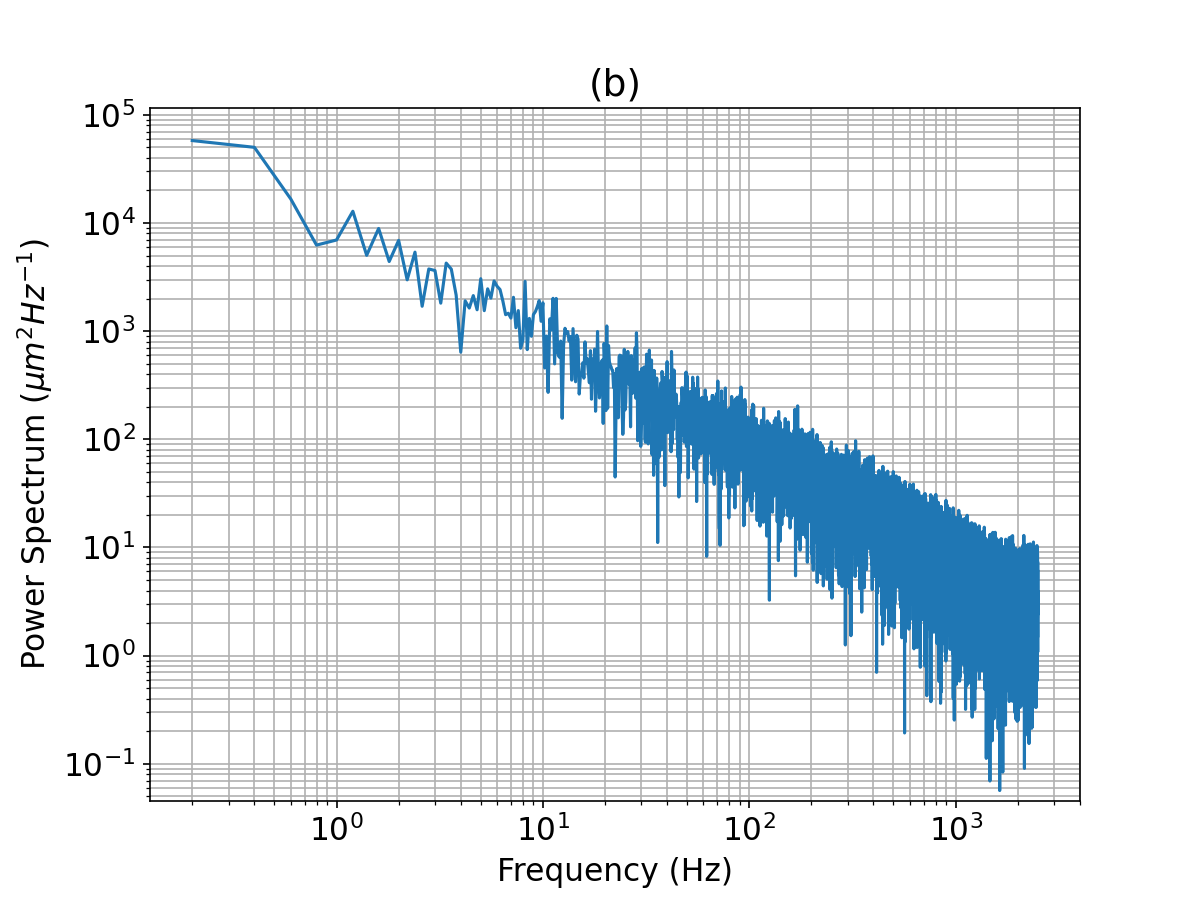

In [12]:
fftplot(xpoints,time)
plt.savefig('BM pds.png')